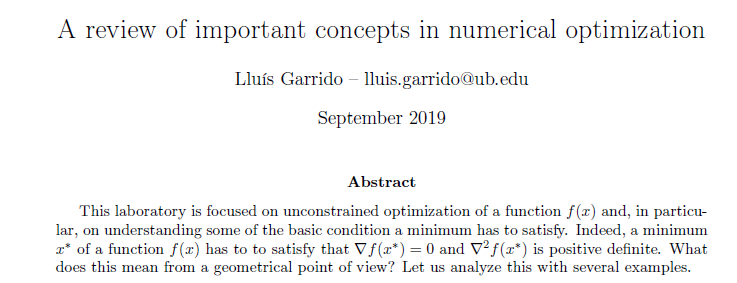

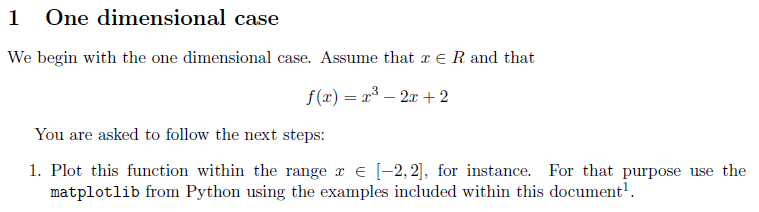

<IPython.core.display.Javascript object>


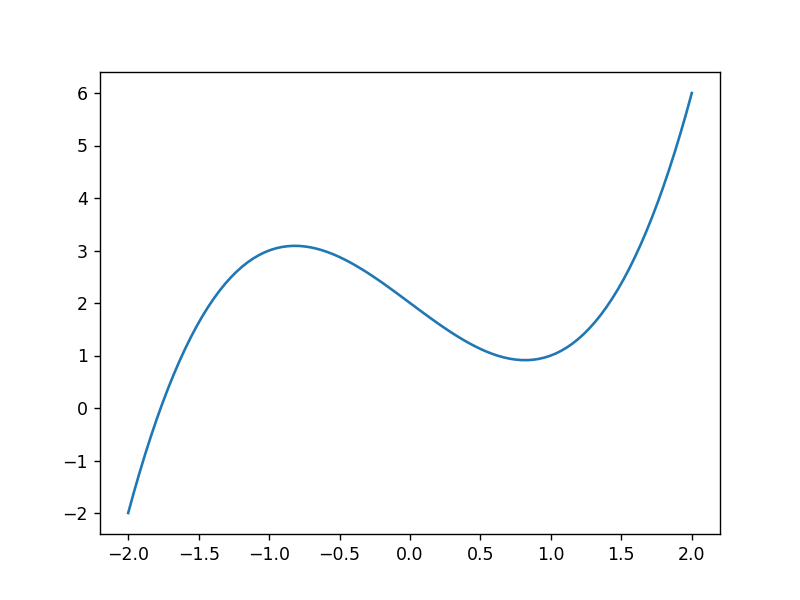

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def fun(x):
    return x**3 - 2 * x + 2


x = np.linspace(-2, 2, 100)
y = fun(x)
plt.plot(x, y)
plt.show()

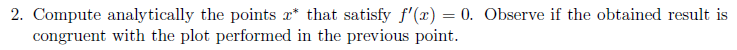


$f'(x)=3x^2-2$

$f'(x)=0 :x=\sqrt{\frac{2}{3}}$

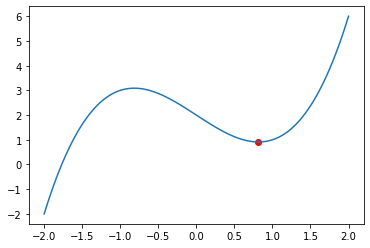

In [19]:
plt.plot(x, y)
x_loc_min = np.sqrt(2 / 3)
y_loc_min = fun(x_loc_min)
plt.scatter(x_loc_min, y_loc_min, c="r")
plt.show()

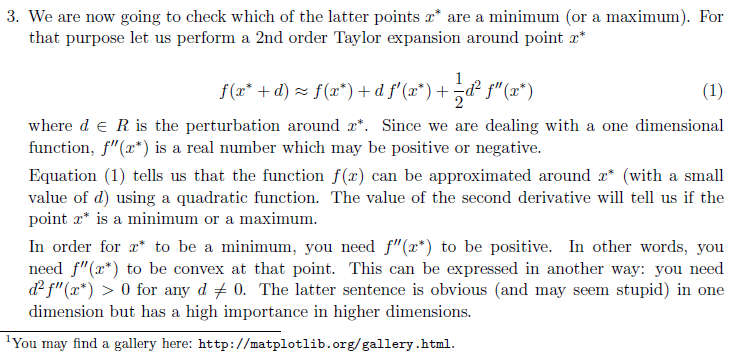

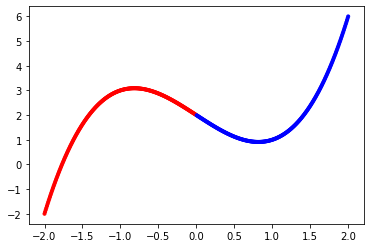

In [41]:
def fun_prime(x):
    return 3 * x**2 + 2


def fun_bis(x):
    return 6 * x


convex = []
x = np.linspace(-2, 2, 500)
y = fun(x)
for x_star in x:
    if fun_bis(x_star) > 0:
        convex.append('b')
    else:
        convex.append('r')

plt.scatter(x, y, c=convex, marker=".")
plt.show()

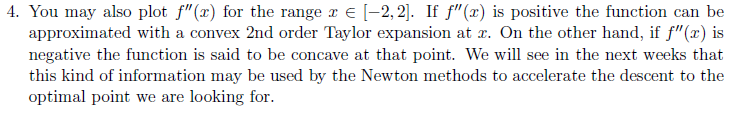

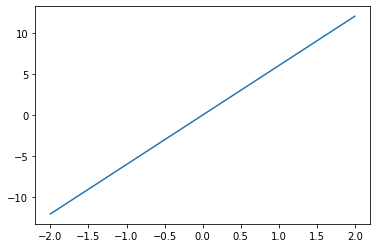

In [42]:
x = np.linspace(-2, 2, 100)
y = fun_bis(x)
plt.plot(x, y)
plt.show()

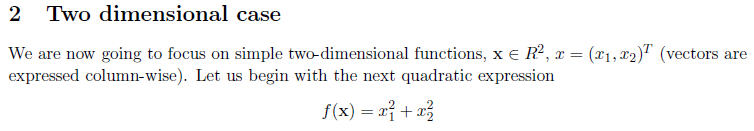

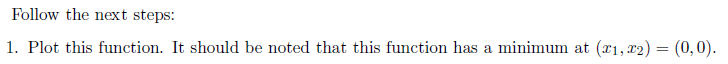

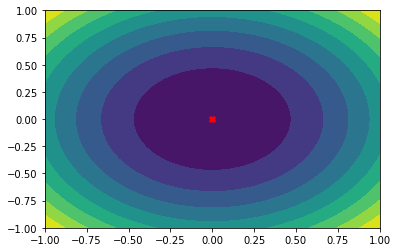

In [89]:
def fun(x_1, x_2):
    return x_1**2 + x_2**2


x_1 = x_2 = np.linspace(-1, 1, 200)
xv, yv = np.meshgrid(x_1, x_2)
y = fun(xv, yv)
plt.contourf(x_1, x_2, y, levels=np.linspace(0, 2, 10))
_ = plt.scatter(0, 0, c='r', marker="X")

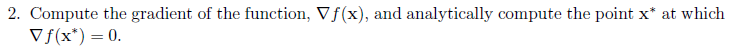

In [103]:
def fun_grad(x_1, x_2):
    return np.asarray([2 * x_1, 2 * x_2])


fun_grad(0, 0)

array([0, 0])

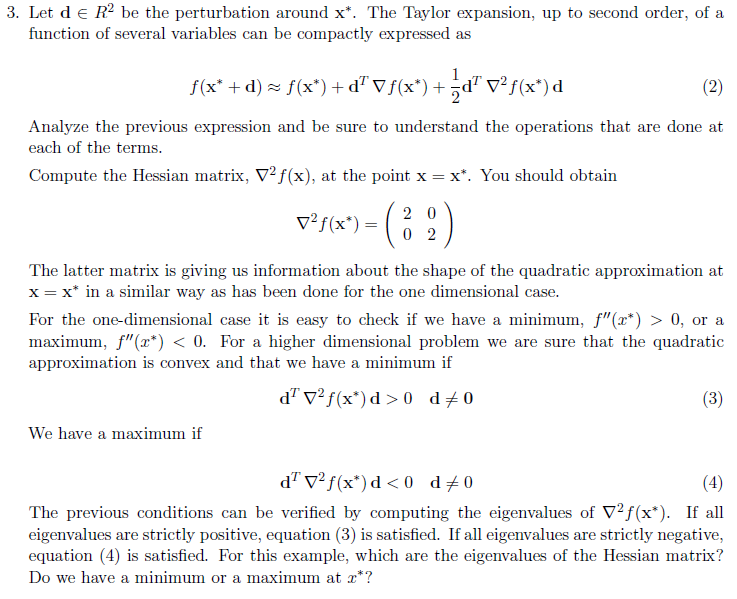

In [110]:
def fun_hessian(x_1, x_2):
    return np.asarray([[2, 0], [0, 2]])


hess = fun_hessian(0.1, 0.1)
w, v = LA.eig(hess)
v >= 0

array([[ True,  True],
       [ True,  True]])

In [122]:
from numpy import linalg as LA

x = np.asarray([0.1, 0.1])
d = x + 0.01
d.T @ hess @ d > 0

True

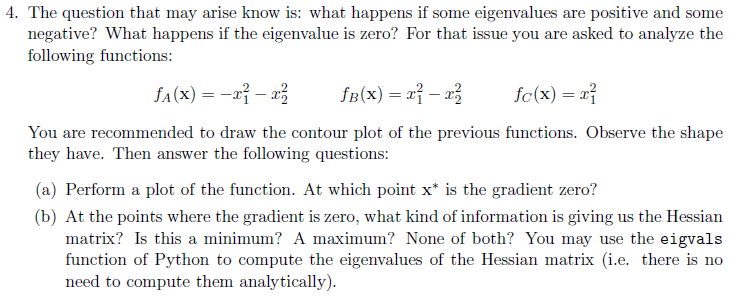

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook


def plot_3d(x_1v, x_2v, y):
    fig = plt.figure()
    ax = Axes3D(fig)
    surf = ax.plot_surface(x_1v, x_2v, y, cmap=cm.coolwarm)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()


def fun_A(x_1, x_2):
    return 17 - x_1**3 - x_2**2


def fun_B(x_1, x_2):
    return x_1**2 - x_2**2


def fun_C(x_1, x_2):
    return x_1**2


x_1 = x_2 = np.linspace(-1, 1, 200)
x_1v, x_2v = np.meshgrid(x_1, x_2)

<IPython.core.display.Javascript object>


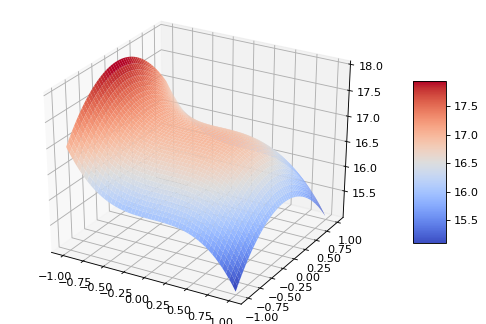

In [273]:
plot_3d(x_1v, x_2v, fun_A(x_1v, x_2v))

<IPython.core.display.Javascript object>


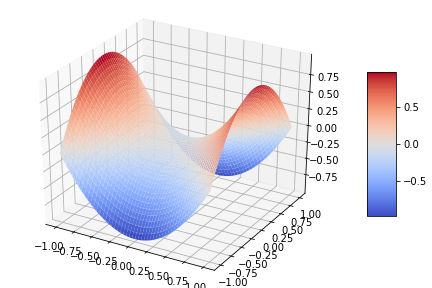

In [169]:
plot_3d(x_1v, x_2v, fun_B(x_1v, x_2v))

<IPython.core.display.Javascript object>


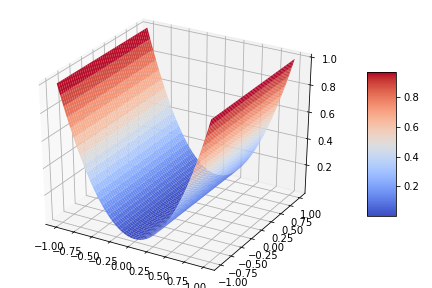

In [168]:
plot_3d(x_1v, x_2v, fun_C(x_1v, x_2v))

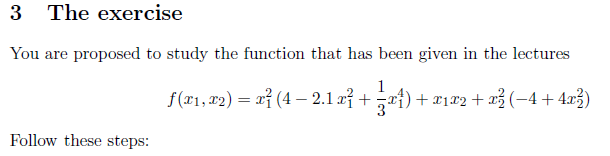

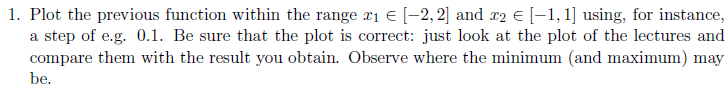

In [12]:
def fun(x_1, x_2):
    return x_1**2 * (4 - 2.1 * x_1**2 + (1 / 3) * x_1**4) + x_1 * x_2 + x_2**2 * (-4 + 4 * x_2**2)

In [13]:
def grad_fun(x_1, x_2):
    return np.stack((8*x_1-8.4*x_1**3+2*x_1**5+x_2, x_1-8*x_2+16*x_2**3))

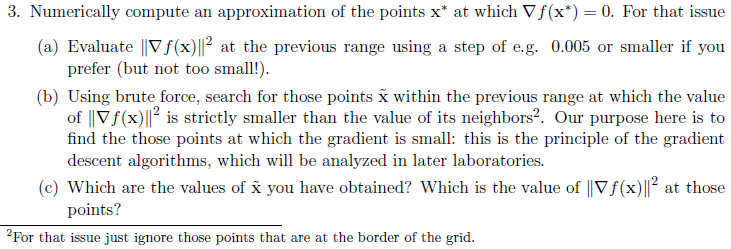

(400, 400) (400, 400) (400, 400)


<IPython.core.display.Javascript object>


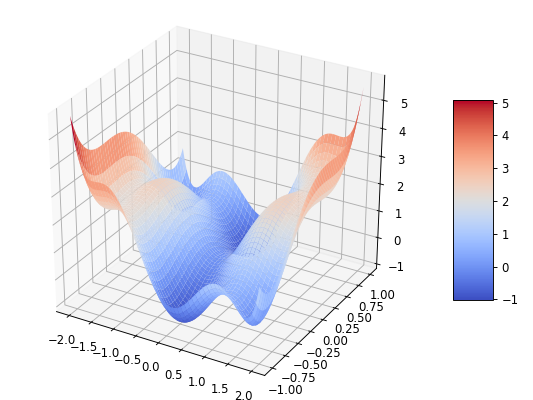

In [132]:
%matplotlib notebook
x_1v, x_2v = np.meshgrid(np.arange(-2,2,0.01), np.arange(-1,1,0.005))
y = fun(x_1v, x_2v)
print(x_1v.shape, x_2v.shape, y.shape)
plot_3d(x_1v, x_2v, y)

<IPython.core.display.Javascript object>


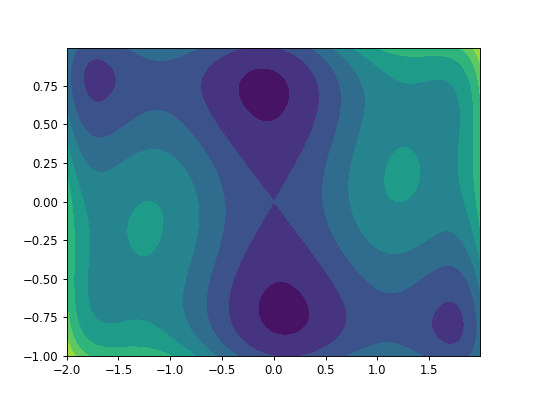

In [136]:
%matplotlib notebook
plt.contourf(x_1, x_2, y, levels=8)

In [ ]:
grad_f_x = grad_fun(x_1v, x_2v)
grad_f_x_1 = grad_f_x[0,:,:]
grad_f_x_2 = grad_f_x[1,:,:]
print(grad_f_x_2.shape)

<IPython.core.display.Javascript object>


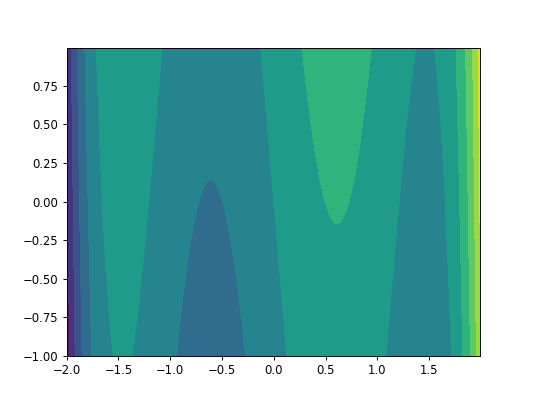

In [135]:
%matplotlib notebook
plt.contourf(x_1, x_2, grad_f_x_1, levels=8)

<IPython.core.display.Javascript object>


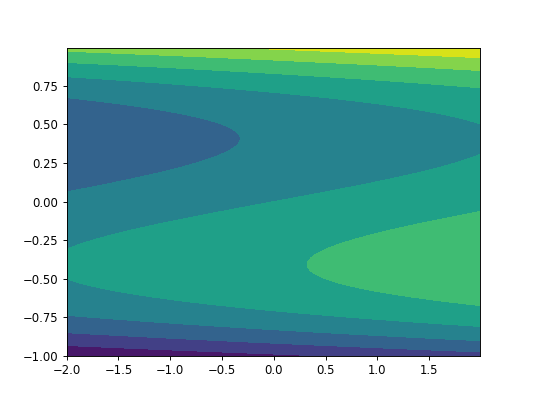

In [137]:
%matplotlib notebook
plt.contourf(x_1, x_2, grad_f_x_2, levels=8)

In [168]:
def find_min_max(grad_f_x):
    minimum_list = []
    maximum_list = []
    #vertical direction
    for i in range(grad_f_x.shape[0]):
        prev_prev_val = grad_f_x[i,0]
        prev_val = grad_f_x[i,1]
        for j in range(2,grad_f_x.shape[0]):
            curr_val = grad_f_x[i,j]
            if prev_val > curr_val and prev_val > prev_prev_val:
                maximum_list.append((x_1v[i,j], x_2v[i,j]))
            if prev_val < curr_val and prev_val < prev_prev_val:
                minimum_list.append((x_1v[i,j], x_2v[i,j]))
            prev_prev_val = prev_val
            prev_val = curr_val
            
    #horizontal  direction
    for i in range(grad_f_x.shape[1]):
        prev_prev_val = grad_f_x[0,i]
        prev_val = grad_f_x[1,i]
        for j in range(2,grad_f_x.shape[1]):
            curr_val = grad_f_x[j,i]
            if prev_val > curr_val and prev_val > prev_prev_val:
                maximum_list.append((x_1v[j,i], x_2v[j,i]))
            if prev_val < curr_val and prev_val < prev_prev_val:
                minimum_list.append((x_1v[j,i], x_2v[j,i]))
            prev_prev_val = prev_val
            prev_val = curr_val
        
    maximum_list = np.array(maximum_list)
    minimum_list = np.array(minimum_list)
    print(maximum_list.shape)
    return maximum_list, minimum_list

(800, 2)
(400, 2)


<IPython.core.display.Javascript object>


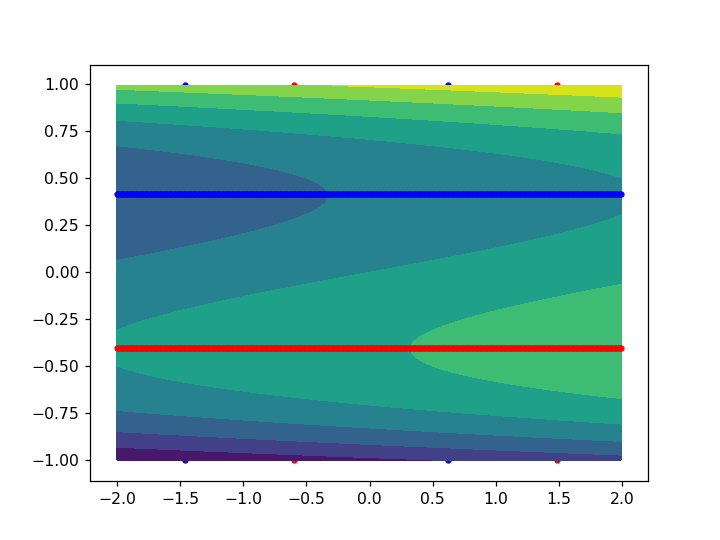

(800, 2)


In [180]:
%matplotlib notebook
plt.contourf(x_1, x_2, grad_f_x_1, levels=8)
maximum_list_1, minimum_list_1 = find_min_max(grad_f_x_1)
plt.scatter(maximum_list_1[:,0], maximum_list_1[:,1], marker='.', color='b')
plt.scatter(minimum_list_1[:,0], minimum_list_1[:,1], marker='.', color='r')

<IPython.core.display.Javascript object>


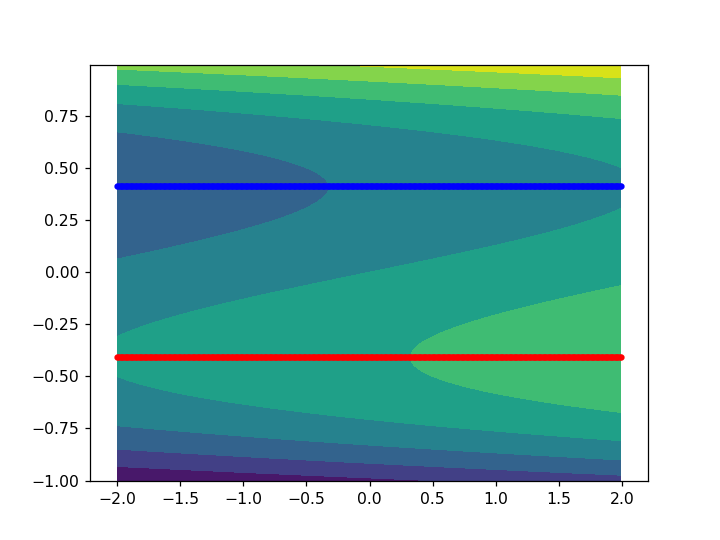

(400, 2)


In [184]:
%matplotlib notebook
plt.contourf(x_1, x_2, grad_f_x_2, levels=8)
maximum_list_2, minimum_list_2 = find_min_max(grad_f_x_2)
plt.scatter(maximum_list_2[:,0], maximum_list_2[:,1], marker='.', color='r')
plt.scatter(minimum_list_2[:,0], minimum_list_2[:,1], marker='.', color='b')

<IPython.core.display.Javascript object>


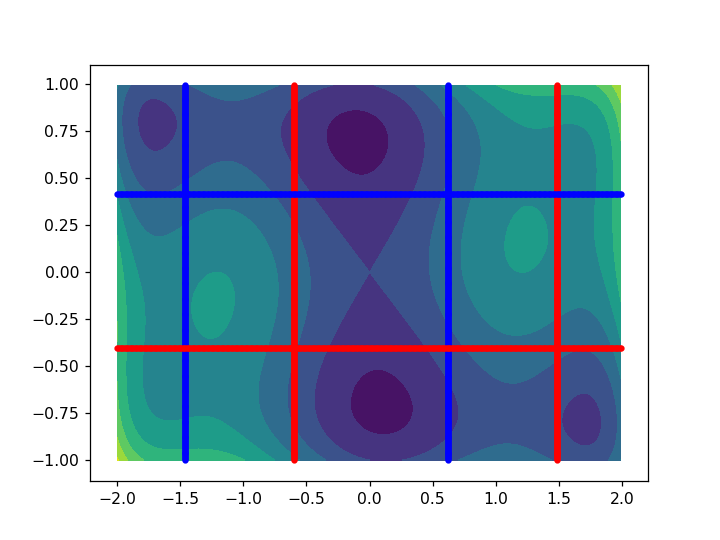

In [185]:
%matplotlib notebook
plt.contourf(x_1, x_2, y, levels=8)
plt.scatter(maximum_list_1[:,0], maximum_list_1[:,1], marker='.', color='b')
plt.scatter(minimum_list_1[:,0], minimum_list_1[:,1], marker='.', color='r')
plt.scatter(maximum_list_2[:,0], maximum_list_2[:,1], marker='.', color='r')
plt.scatter(minimum_list_2[:,0], minimum_list_2[:,1], marker='.', color='b')
plt.show()